In [62]:
import pandas as pd
import json

In [63]:
def to_xlsx(name_json, name_xlsx):
    with open(name_json, 'r') as file:
        json_data = file.read()

    # Преобразование JSON-строки в словарь
    data = json.loads(json_data)

    # Извлечение списка бенчмарков
    benchmarks = data["benchmarks"]
    
    df = pd.DataFrame(benchmarks)
    
    selected_columns = df[['name', 'real_time', 'cpu_time', 'iterations']]
    selected_columns['real_time'] = selected_columns['real_time'].round(3)
    selected_columns['cpu_time'] = selected_columns['cpu_time'].round(3)
    
    selected_columns = selected_columns.rename(columns={'real_time': 'real_time(ms)',
                                     'cpu_time': 'cpu_time(ms)'})
    
    
    tmp = selected_columns.copy()
    split_data = selected_columns['name'].str.split('/', expand=True)
    tmp.drop(columns='name', inplace=True)
    tmp.insert(0, 'Algorithm', split_data[0])
    tmp.insert(1, 'Array', split_data[1])
    
    tmp['Array'] = tmp['Array'].str.split('.', n=1, expand=True)[0]
    
    tmp['Size'] = tmp['Array'].str.rsplit('_', n=1, expand=True)[1].astype(int)
    tmp['Array'] = tmp['Array'].str.rsplit('_', n=1, expand=True)[0]
    
    split_data = tmp['Algorithm'].str.rsplit('_', n=1, expand=True)
    tmp.drop(columns='Algorithm', inplace=True)
    #tmp.insert(0, 'Algorithm', split_data[0])
    tmp.insert(0, 'Algorithm', split_data[1])
    
    tmp['Algorithm'] = tmp['Algorithm'].str.replace('BM_', '')
    
    tmp.to_excel(name_xlsx, index=False)



In [64]:
to_xlsx('bm_normal_int.json', 'output_normal_int.xlsx')

C:\Users\odo20\AppData\Local\Temp\ipykernel_31300\1413422277.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['real_time'] = selected_columns['real_time'].round(3)
C:\Users\odo20\AppData\Local\Temp\ipykernel_31300\1413422277.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['cpu_time'] = selected_columns['cpu_time'].round(3)


In [65]:
table = pd.read_excel('output_normal_int.xlsx', sheet_name=0)
table

,Algorithm,Array,real_time(ms),cpu_time(ms),iterations,Size
0,MergeSort,int_normal,246.046,170.139,9,1000000
1,CountingSort,int_normal,7.700,4.883,112,1000000
2,MergeSort,int_uniform,233.609,145.089,7,1000000
3,CountingSort,int_uniform,7.404,6.250,100,1000000
4,MergeSort,int_normal,479.120,281.250,2,2000000
...,...,...,...,...,...,...
75,CountingSort,int_uniform,133.326,68.182,11,19000000
76,MergeSort,int_normal,5042.330,2984.375,1,20000000
77,CountingSort,int_normal,197.269,105.903,9,20000000
78,MergeSort,int_uniform,4891.382,3031.250,1,20000000


In [66]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


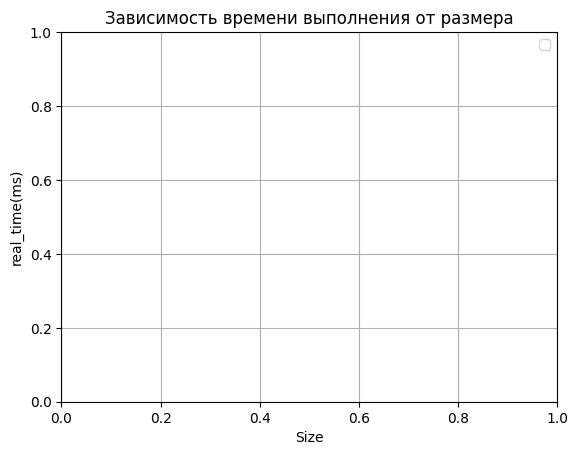

In [67]:
# Предполагаем, что 'table' - это ваш DataFrame
for benchmark_name_tuple, group in table.groupby(['Algorithm', 'Array']):
    if benchmark_name_tuple[0] in ('BubbleSort', 'InsertionSort'):
        #group = group[group['Size'] < 300_000]
        group = group.sort_values(by='Size', ascending=True)
        plt.plot(group["Size"], group["real_time(ms)"],  label=benchmark_name_tuple)

plt.xlabel("Size")
plt.ylabel("real_time(ms)")
plt.title("Зависимость времени выполнения от размера")
plt.legend()
plt.grid(True)
plt.show()

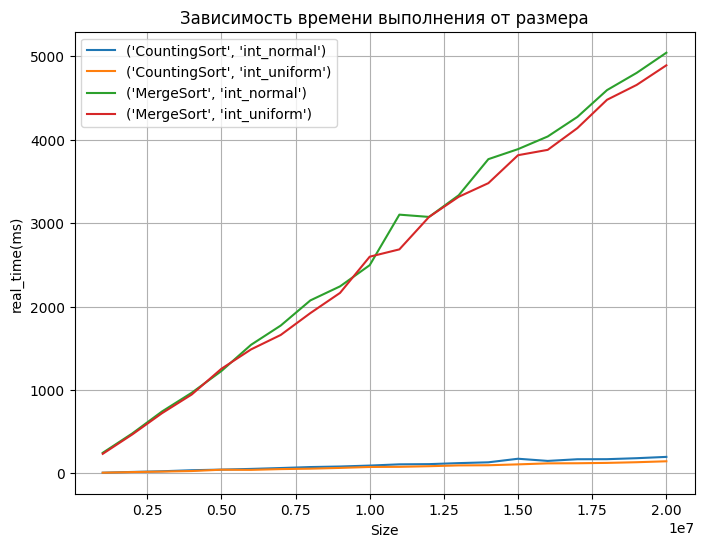

In [76]:
# Предполагаем, что 'table' - это ваш DataFrame
plt.figure(figsize=(8, 6))
for benchmark_name_tuple, group in table.groupby(['Algorithm', 'Array']):
    if benchmark_name_tuple[0] not in ('BubbleSort', 'InsertionSort'):
        #group = group[group['Size'] < 500]
        #group = group[group['Size'] < 100000]
        group = group.sort_values(by='Size', ascending=True)
        plt.plot(group["Size"], group["real_time(ms)"],  label=benchmark_name_tuple)

plt.xlabel("Size")
plt.ylabel("real_time(ms)")
plt.title("Зависимость времени выполнения от размера")
plt.legend()
plt.grid(True)
plt.show()

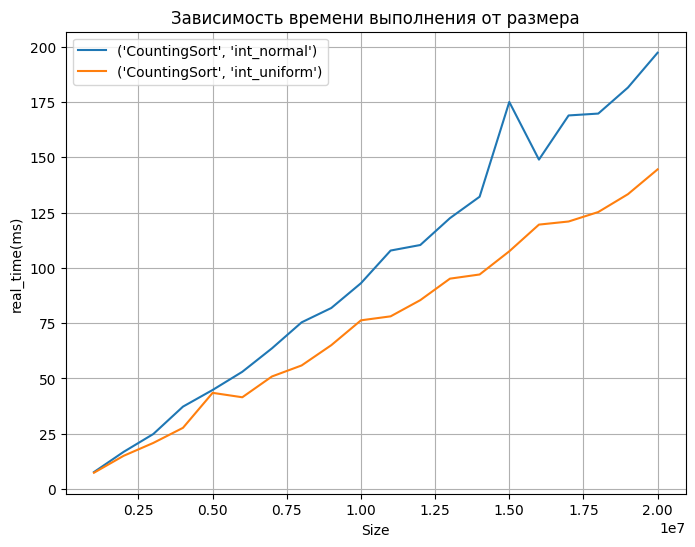

In [69]:
# Предполагаем, что 'table' - это ваш DataFrame
plt.figure(figsize=(8, 6))
for benchmark_name_tuple, group in table.groupby(['Algorithm', 'Array']):
    if benchmark_name_tuple[0] in ('CountingSort'):
        group = group[group['Size'] > 500]
        group = group.sort_values(by='Size', ascending=True)
        plt.plot(group["Size"], group["real_time(ms)"],  label=benchmark_name_tuple)

plt.xlabel("Size")
plt.ylabel("real_time(ms)")
plt.title("Зависимость времени выполнения от размера")
plt.legend()
plt.grid(True)
plt.show()